# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

/home/lawhy/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [2]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')
print("The basic information of auto_numeric:")
display(auto_numeric.info())
print("The summary of auto_numeric:")
display(auto_numeric.describe())
print("The dataset looks like:")
display(auto_numeric.head(5))

The basic information of auto_numeric:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
normalized-losses          159 non-null float64
wheel-base                 159 non-null float64
length                     159 non-null float64
width                      159 non-null float64
height                     159 non-null float64
engine-size                159 non-null float64
bore                       159 non-null float64
stroke                     159 non-null float64
compression-ratio          159 non-null float64
engine-power               159 non-null float64
peak-rpm                   159 non-null float64
city-mpg                   159 non-null float64
highway-mpg                159 non-null float64
mean-effective-pressure    159 non-null float64
torque                     159 non-null float64
price                      159 non-null float64
dtypes: float64(16)
memory usage: 20.0 KB


None

The summary of auto_numeric:


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


The dataset looks like:


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.4,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.4,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.8,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.5,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.8,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0


(2) ***Your answer goes here:***

From what is displayed, we can see that there are 159 data points (rows) and 15 attributes and 1 price column (in total 16 columns). Notice also that the 15 attributes are mostly about the technical details that affect the real performance of a car.

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the (pairwise) distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

'The correlation coefficient of normalized-losses vs price is: 0.01536764742365821'

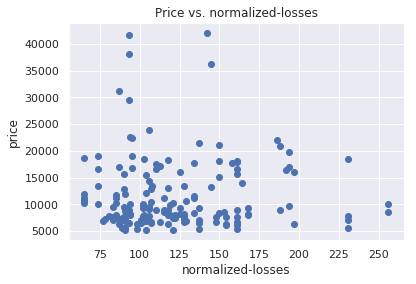

'The correlation coefficient of wheel-base vs price is: 0.4235105951503859'

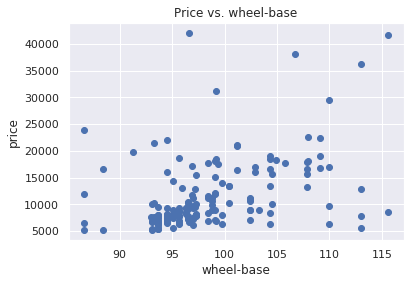

'The correlation coefficient of length vs price is: 0.5128830452653907'

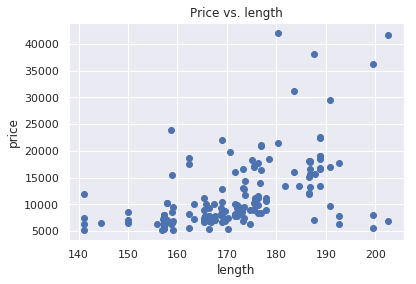

'The correlation coefficient of width vs price is: 0.5243255521274498'

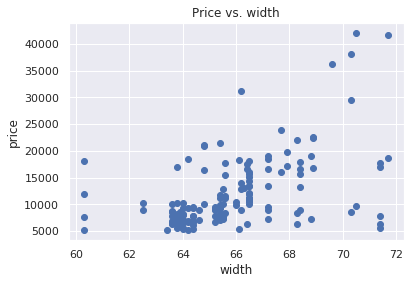

'The correlation coefficient of height vs price is: 0.13956255898680384'

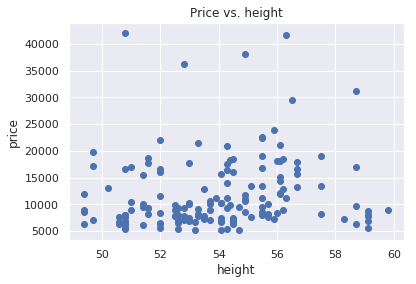

'The correlation coefficient of engine-size vs price is: 0.7151245901914791'

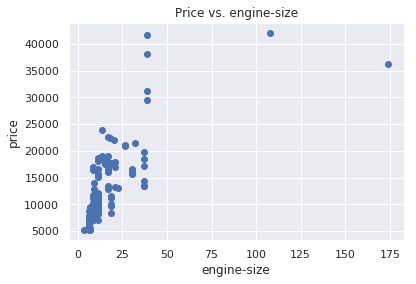

'The correlation coefficient of bore vs price is: 0.3652072892128545'

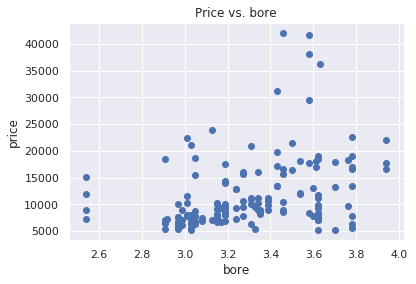

'The correlation coefficient of stroke vs price is: 0.12783403193265092'

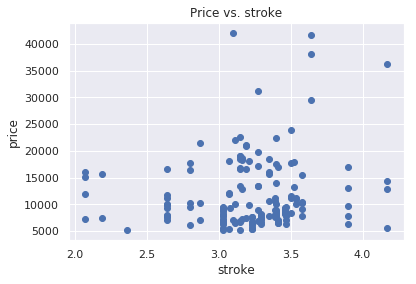

'The correlation coefficient of compression-ratio vs price is: 0.12568322167466559'

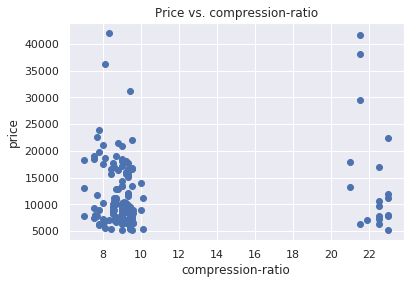

'The correlation coefficient of engine-power vs price is: 0.4439685914631636'

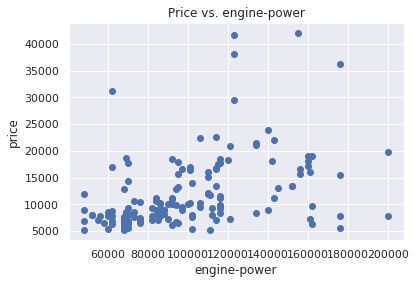

'The correlation coefficient of peak-rpm vs price is: -0.09934529106318549'

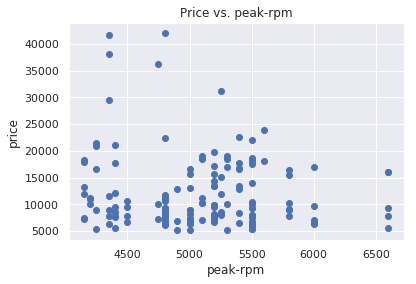

'The correlation coefficient of city-mpg vs price is: -0.35678950067247045'

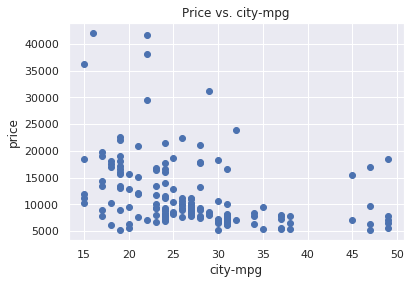

'The correlation coefficient of highway-mpg vs price is: -0.43846743171443286'

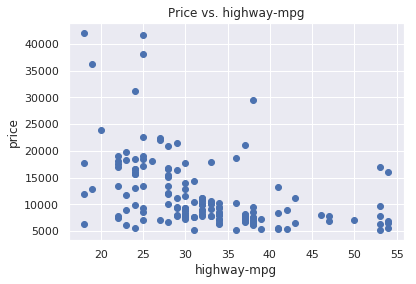

'The correlation coefficient of mean-effective-pressure vs price is: -0.10486005065048896'

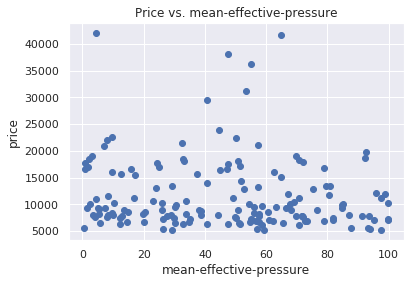

'The correlation coefficient of torque vs price is: 0.1014345813072747'

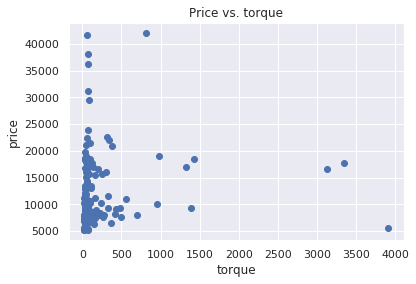

"The five most correlated attributes with price: ['engine-size' 'width' 'length' 'engine-power' 'highway-mpg']"

In [3]:
# (1) # Your Code goes here:
# Separate price and other attributes
price = auto_numeric['price']
attrs = auto_numeric.drop(columns=['price'], inplace=False)
# for each attribute, compute the correlation coefficient w.r.t price
corr_list = [ pearsonr(attrs[attr], price)[0] for attr in attrs]
# display the correlation coefficent as well as the distribution of each attribute with price
sns.set(style="darkgrid")
for i in range(len(corr_list)):
     display("The correlation coefficient of " + str(attrs.columns[i]) + " vs price is: " + str(corr_list[i]))
     plt.scatter(attrs[attrs.columns[i]], price)
     plt.xlabel(attrs.columns[i])
     plt.ylabel('price')
     plt.title('Price vs. ' + str(attrs.columns[i]))
     plt.show()
# display the attributes corresponding to the top five absoulute correlation coefficients
sorted_index = np.argsort([ abs(corr) for corr in  corr_list])[::-1].tolist()
five_attrs = attrs.columns.values[sorted_index][:5]
display("The five most correlated attributes with price: " + str(five_attrs))


(2) ***Your answer goes here:***

The correlation coefficient tells us if its **absolute value** is closer to 1, then it implies a stronger correlation (either positive or negative). From this I conclude that the five most useful attributes in predicting the price from observing the correlation coefficients are : 
1. 'engine-size'; 
2. 'width'; 
3. 'length';
4. 'engine-power';
5. 'highway-mpg'.

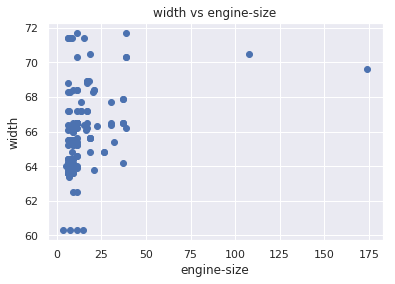

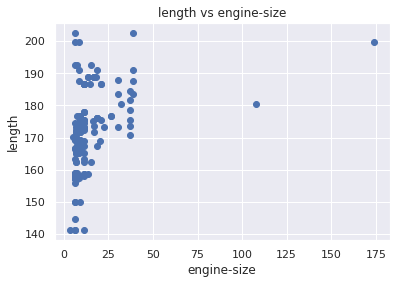

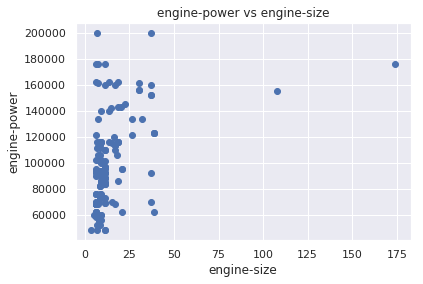

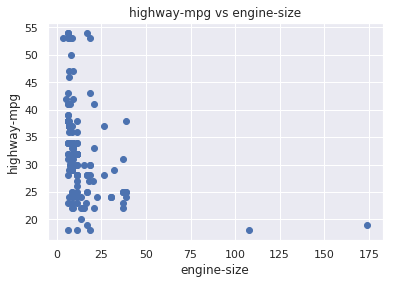

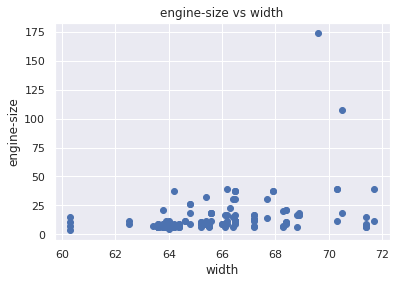

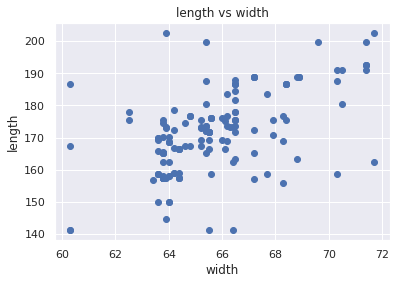

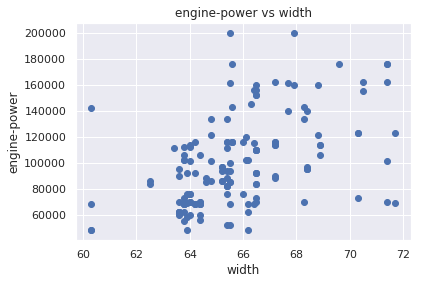

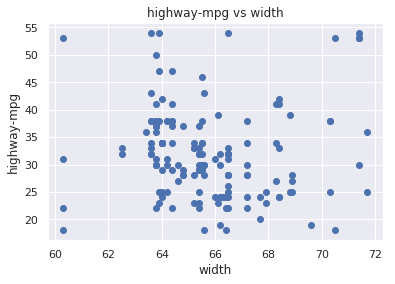

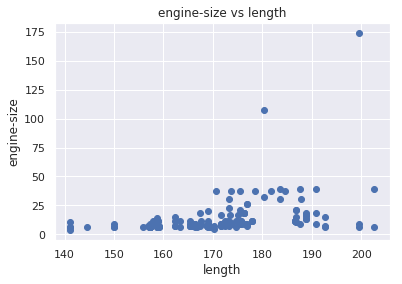

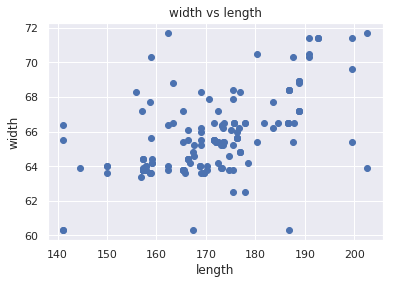

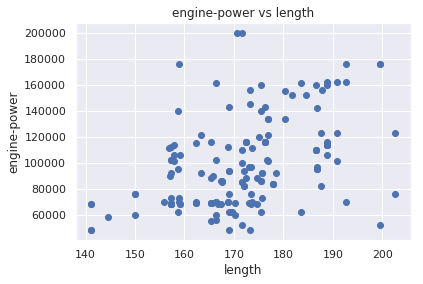

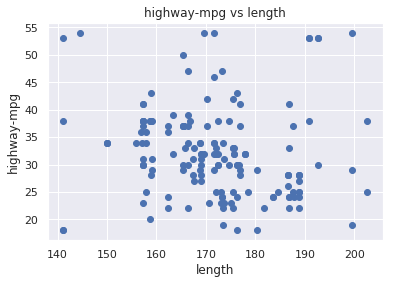

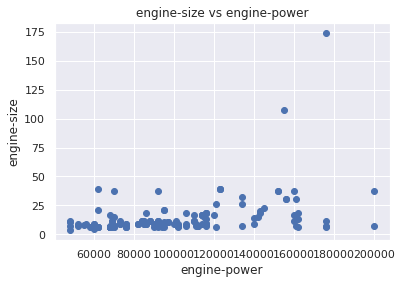

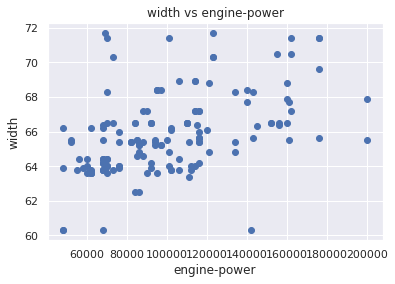

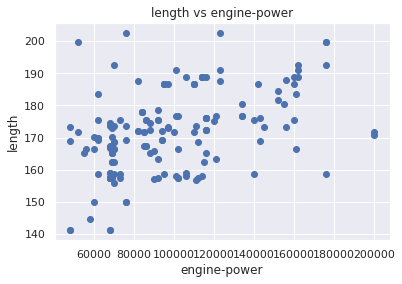

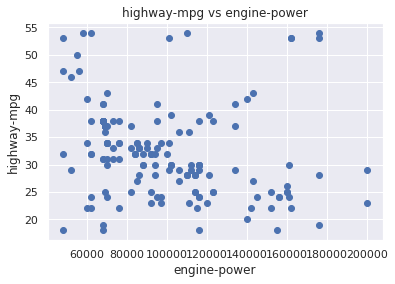

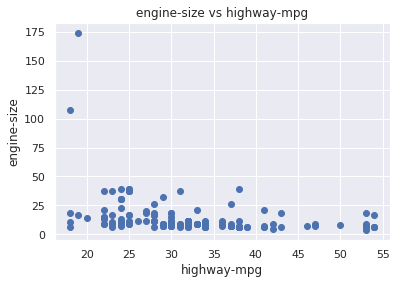

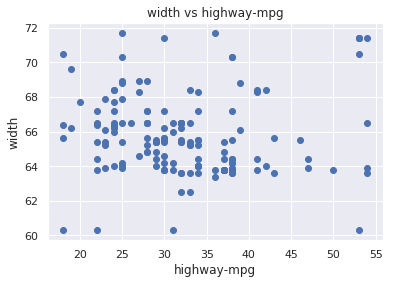

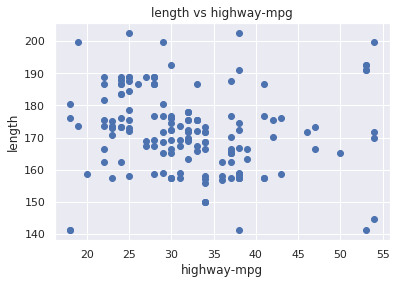

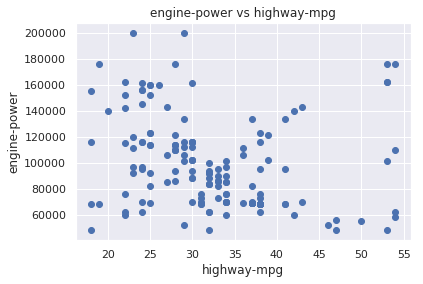

In [4]:
# (3) # Your Code goes here:
# scatter the 5 attributes w.r.t each other
for at1 in five_attrs:
    for at2 in five_attrs:
        if not at2 == at1:
            plt.scatter(attrs[at1], attrs[at2]) 
            plt.xlabel(at1)
            plt.ylabel(at2)
            plt.title(at2 + " vs " + at1)
            plt.show()

(4) ***Your answer goes here:***

From the pairwise scatter plots, I do not think any two of the selected five attributes are significantly correlated.

(5) ***Your answer goes here:***

I would consider removing attributes with very poor correlation with price such as "normalised-losses" ($r \approx $ 0.0153), "mean-effective-pressure" ($r \approx $ -0.105), "torque" ($r \approx $ 0.101) and so on.

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

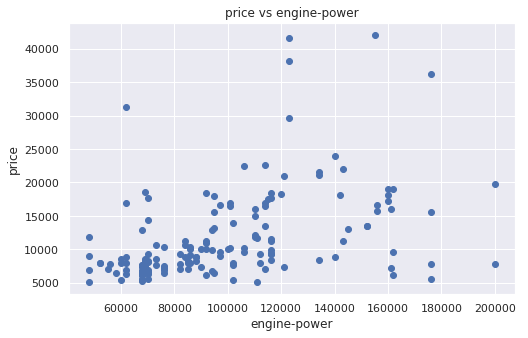

In [5]:
# (1) # Your Code goes here:
plt.figure(figsize=(8,5))
plt.scatter(auto_numeric["engine-power"], auto_numeric["price"]) 
plt.xlabel("engine-power")
plt.ylabel("price")
plt.title("price vs engine-power")
plt.show()

(2) ***Your answer goes here:***

The scatter plot of price against engine-power shows a vague positive correlation, this may imply that the attribute engine-power can partially predict the price.

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

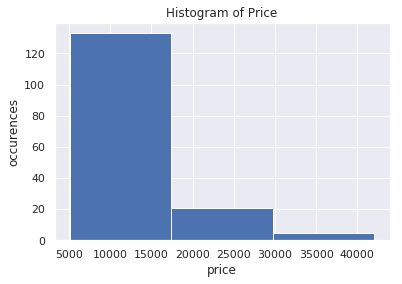

In [6]:
# (1) # Your Code goes here:
# I have extracted price in the code above, so just plot the histogram here
plt.hist(price, range=[int(min(price)), int(max(price))], bins=3)
plt.xlabel("price")
plt.ylabel("occurences")
plt.title("Histogram of Price")
plt.show()

(2) ***Your answer goes here:***

The prices of the automobiles are mostly within 25000, but there are some obvious outliers (automobiles with a very high price) that can easily change the linear pattern, this makes it difficult to model using Linear Regression. However, we can improve the applicability of linear regression by applying a **basis expansion** (e.g. Polynomial, Logarithmic) on some attribute,  thus reducing the impact of outliers. Another way is to simply **remove the outliers**.

It is not conclusive at this stage because we have not determined to what extent the Linear Regression model fit our original data.

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

In [7]:
# Your Code goes here:
# make a deep copy of auto_numeric
data_simple_regression = auto_numeric.copy(deep=True)
# extract the "engine-power" and "price" columns and convert them to 2D arrays
X = data_simple_regression["engine-power"][:, np.newaxis]
y = data_simple_regression["price"][:, np.newaxis]
# split the training and testing data in a ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

In [8]:
# Your Code goes here:
baseline_price = np.sum(price) / price.shape[0] # mean = sum / number of data points
display("We use the mean of all the prices: " + str(baseline_price) + " to build a simple baseline, "
        + "and this requires a single parameter n: the number of data points, and its value is: " + str(price.shape[0]) + ".")

'We use the mean of all the prices: 11684.723270440252 to build a simple baseline, and this requires a single parameter n: the number of data points, and its value is: 159.'

<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters: ***N.B.*** *Here we mean the weights of the Regression  Function*.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

In [9]:
# (1) # Your Code goes here:
lm = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lm.fit(X_train, y_train)
weights = np.array([lm.coef_, lm.intercept_])
display("The weights of the Regression Function is: " + str(weights.tolist()))

'The weights of the Regression Function is: [[0.08988388743866609], [2823.12189110283]]'

(2) ***Your answer goes here:***

The result shows a very poor postive linear relationship (coefficient is $\approx 0.0899$) between "engine-power" and "price" and the intercept ($\approx 2823$) indicates a lower bound of the price. So if the engine-power increases, the price will increase but very slowly.

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points (i.e. plot the independent variable along the X-axis and the price along the Y-axis). Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

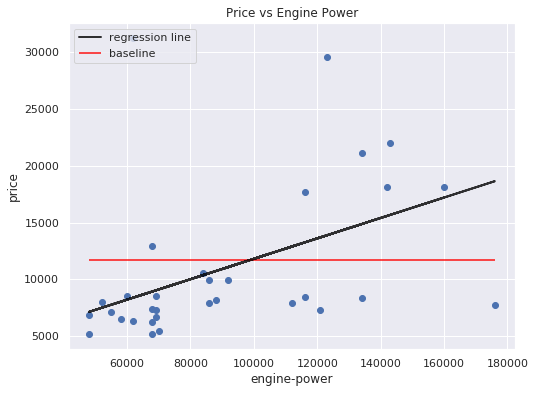

In [10]:
# (1) # Your Code goes here:
plt.figure(figsize=(8,6))
# scatter the test-data
plt.scatter(X_test, y_test)
# plot the regression line
y_test_predict = lm.predict(X_test)
plt.plot(X_test, y_test_predict, color='black', lw=2, label='regression line', alpha=0.8)
# plot the baseline
plt.hlines(baseline_price, min(X_test), max(X_test), color='red', lw=2, label='baseline', alpha=0.7)
# labelling everything
plt.xlabel("engine-power")
plt.ylabel("price")
plt.title('Price vs Engine Power')
plt.legend(loc='upper left')
plt.show()

(2) ***Your answer goes here:***

Apparently the Linear Regression model fits more data points than the Baseline model, thus indicating at least a slight improvement here.

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

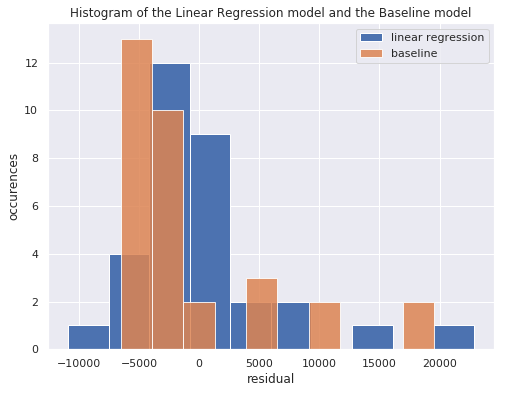

In [11]:
# (1) # Your Code goes here:
plt.figure(figsize=(8,6))
# residual is defined by: (observed value) - (predicted value) 
residual_lm = y_test - y_test_predict
residual_baseline = y_test - baseline_price
# plot the histogram and label everything
plt.hist(residual_lm, label="linear regression")
plt.hist(residual_baseline, label="baseline", alpha=0.85)
plt.xlabel("residual")
plt.ylabel("occurences")
plt.title("Histogram of the Linear Regression model and the Baseline model")
plt.legend()
plt.show()

In [12]:
# (2) # Your Code goes here:
# vectorize the baseline_price so as to have the same dimension as y_test
baseline_price_vectorized = y_test + baseline_price - y_test
# Coefficient of Determination
r2_lm = r2_score(y_test, y_test_predict)
display("The coefficient of determination for the Linear Regression model is: " + str(r2_lm))
r2_baseline = r2_score(y_test, baseline_price_vectorized) # just a lazy way of broadcasting here.
display("The coefficient of determination for the Basline model is: " + str(r2_baseline))
# RMSE is just the square root of mean squared error
rmse_lm = sqrt(mean_squared_error(y_test, y_test_predict))
display("The RMSE for the Linear Regression model is: " + str(rmse_lm))
rmse_baseline = sqrt(mean_squared_error(y_test, baseline_price_vectorized))
display("The RMSE for the Baseline model is: " + str(rmse_baseline))

'The coefficient of determination for the Linear Regression model is: 0.16852372539951466'

'The coefficient of determination for the Basline model is: -0.00982455873278787'

'The RMSE for the Linear Regression model is: 6153.70386613629'

'The RMSE for the Baseline model is: 6781.638354494783'

(3) ***Your answer goes here:***

The histogram above shows the distribution of residuals under both the Linear Regression model and the Baseline model, and residual is defined as: **(true value) - (predicted value)**. So from the graph we can see that the Linear Regression model gives on average a smaller error **(more residuals close to 0)** than the Baseline model. This gives us a graphical intuition that the Linear Regression model performs better than the Baseline.

Also, consider the comparison of the two measures, $R^2$ and $RMSE$:
1. The $R^2$ value of the Linear Regression model is **closer to 1** than that of the Baseline model.
2. The $RMSE$ value of the Linear Regression model is **smaller** than that of the Baseline model.

Both measures demonstrate that the Linear Regression model fits the test data better than the Baseline model.

In conclusion, the Linear Regression model has a better performance than the Baseline model.


<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



(1) ***Your answer goes here:***

Since the whole dataset is of a **small size**, by partioning the data points into two sets, we drastically reduce the number of data points which can be used for model training, and the results can really depend on a particular random choice for the pair of (train, validation) sets. So if we use only one hold-out test set, all the interpretations of the results will be **biased**.

In [13]:
# (2) # Your Code goes here:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [14]:
# (3) # Your Code goes here:'
# Generate new predictions using KFold
lm_new = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
cross_pred = cross_val_predict(lm_new, X, y, cv=kf)
# Compute the R-square and RMSE
r2_cross = r2_score(y, cross_pred )
rmse_cross = sqrt(mean_squared_error(y, cross_pred ))
display("The R-square derived from KFold is: " + str(r2_cross))
display("The RMSE derived from KFold is: " + str(rmse_cross))

'The R-square derived from KFold is: 0.1730052709757075'

'The RMSE derived from KFold is: 6114.452118615525'

(4) ***Your answer goes here:*** 

After doing the k-fold cross-validation, we now have more reliable $R^2$ and $RMSE$. Compared with the previous results, $R^2$ **increases** and $RMSE$ **decreases**, this means the Linear Regression model is even better than the one we get from the hold-out validation. The new results still demonstrate a better performance of the Linear Regression model than the Baseline model.

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [15]:
# (1) # Your Code goes here:

In [16]:
# (2) Show any working code here...
# Your Code goes here:

(2) - Final Conclusion(s)
***Your answer goes here:***

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

In [17]:
# (1) # Your Code goes here:
lm_all = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
X_all = auto_numeric.drop(columns=['price'], inplace=False)
y_all = auto_numeric['price']
cross_pred_all = cross_val_predict(lm_all, X_all, y_all, cv=kf)
# Compute the R-square and RMSE
r2_all = r2_score(y_all, cross_pred_all)
rmse_all = sqrt(mean_squared_error(y_all, cross_pred_all))
display("The R-square derived from KFold in the multivariate case is: " + str(r2_all))
display("The RMSE derived from KFold in the multivariate case is: " + str(rmse_all))

'The R-square derived from KFold in the multivariate case is: 0.48613798445731105'

'The RMSE derived from KFold in the multivariate case is: 4819.804642834607'

(2) ***Your answer goes here:***

In the multi-vairate case, the results are even **better**: the value of $R^2$ is almost a half, which means nearly $50\%$ of the total variations are described by the Multi-Vairate Linear Regression model; the value of $RMSE$ is significantly lower, this means our residuals are generally smaller, resulting in a better fit of data.

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` (plot below)
1. [Text] Why might this cause a problem for linear regression? 

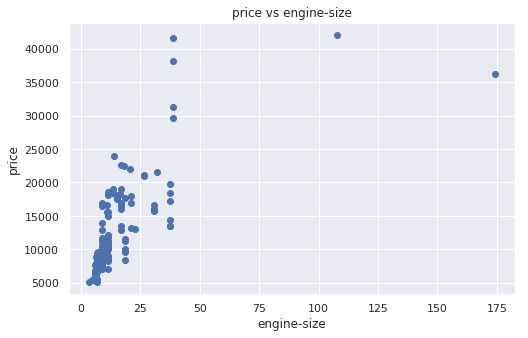

In [18]:
# (1) # Your Code goes here:
plt.figure(figsize=(8,5))
plt.scatter(auto_numeric["engine-size"], auto_numeric["price"]) 
plt.xlabel("engine-size")
plt.ylabel("price")
plt.title("price vs engine-size")
plt.show()

(2) ***Your answer goes here:***

From the graph we can see that most data points group together and fit a line with a large gradient, but there are two obvious outliers that can affect the whole pattern, resulting in a much flatter line.

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a (Multi-variate) LinearRegression Model (on all the attributes including the transformed `engine-size`) and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

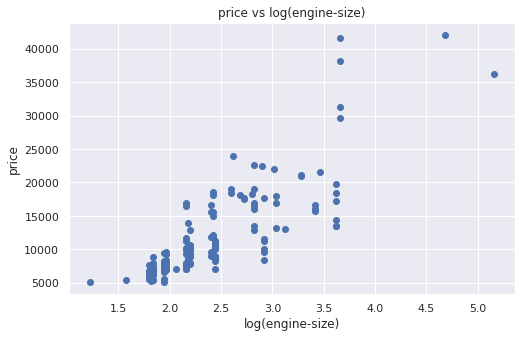

In [19]:
# (1) # Your Code goes here:
# Apply the Logarithmic Transformation on the engine-size attribute as the data points seem to be grouped up
X_log = np.log(auto_numeric["engine-size"])
plt.figure(figsize=(8,5))
plt.scatter(X_log, auto_numeric["price"]) 
plt.xlabel("log(engine-size)")
plt.ylabel("price")
plt.title("price vs log(engine-size)")
plt.show()

In [20]:
# (2) # Your Code goes here:
lm_final = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
X_final = auto_numeric.drop(columns=['price'], inplace=False)
X_final["engine-size"] = X_log # do transformation on the engine-size column
y_final = auto_numeric['price']
cross_pred_final = cross_val_predict(lm_final, X_final, y_final, cv=kf)
# Compute the R-square and RMSE
r2_final = r2_score(y_final, cross_pred_final)
rmse_final = sqrt(mean_squared_error(y_final, cross_pred_final))
display("The R-square derived from KFold is: " + str(r2_final))
display("The RMSE derived from KFold is: " + str(rmse_final))

'The R-square derived from KFold is: 0.6896122680289585'

'The RMSE derived from KFold is: 3745.9195975598013'

(3) ***Your answer goes here:***

The performance of the model increases significantly by observing the two measures $R^2$ and $RMSE$. The reasons of such a significant improvement are:
1. As discussed before, "engine-size" has the largest correlation coefficient w.r.t "price", this implies a strong correlation and thus a strong influenece on the price.
2. The Logarithmic Transformation scales the engine-size axis, resulting in a more linear pattern which fits the data better. Therefore, it becomes more applicable to use the Linear Regression model.

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

In [21]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) ***Your answer goes here:***

In [22]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***